# Exploratory Data Analysis (EDA)

In this notebook, I try to analyze if there are insightful differences between normal vs. anomalous data.

In [1]:
import pandas as pd
from config import *
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from data.visualize import plot_samples

In [2]:
data_dir = os.path.join(ROOT_DIR, DATA_RAW_DIR, "no_leak")
all_files = glob.glob(os.path.join(data_dir, "*.csv"))
df_list = [pd.read_csv(file, index_col=0) for file in all_files]
df_no_leak = pd.concat(df_list, ignore_index=True)
df_no_leak['timestamp'] = pd.to_datetime(df_no_leak['timestamp'])
df_no_leak.set_index('timestamp', inplace=True)

data_dir = os.path.join(ROOT_DIR, DATA_RAW_DIR, "leak")
all_files = glob.glob(os.path.join(data_dir, "*.csv"))
df_list = [pd.read_csv(file, index_col=0) for file in all_files]
df_leak = pd.concat(df_list, ignore_index=True)
df_leak['timestamp'] = pd.to_datetime(df_leak['timestamp'])
df_leak.set_index('timestamp', inplace=True)

## Probability Density of Normal vs. Anomalous Data

From the KDE plots below, it can be seen that:

- In normal conditions, most of the data points have low pressure and low flow.
- In anomalous conditions, the flow distribution is more spread out and there is a more pronounced second pressure peak.

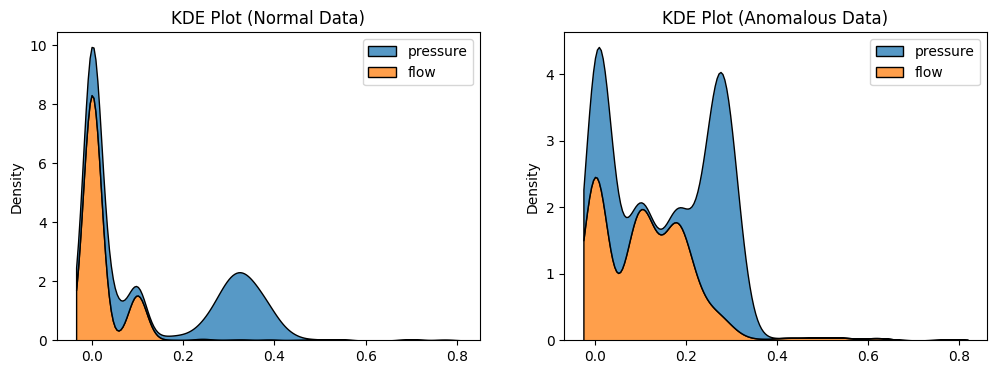

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.kdeplot(df_no_leak, multiple="stack", cut=True, ax=ax[0])
ax[0].set_title("KDE Plot (Normal Data)")

sns.kdeplot(df_leak, multiple="stack", cut=True, color="", ax=ax[1])
ax[1].set_title("KDE Plot (Anomalous Data)")
fig.savefig(os.path.join(FIGURES_DIR, "kde_plot.png"), dpi=fig.dpi)

## Sample Distribution in Normal vs. Anomalous Data

The scatter plots compare the relationship between flow and pressure for normal and anomalous data.

In the normal plot (left plot), the data points show a concentrated region at low flow values (near 0), with a wider spread in pressure.

In the anomalous plot (right plot), the concentrated region from the normal plot moved more to the right, towards higher flow values. 

In both plots, we can see an imaginary line with a downwards slope, suggesting an inverse relationship between pressure and flow. 

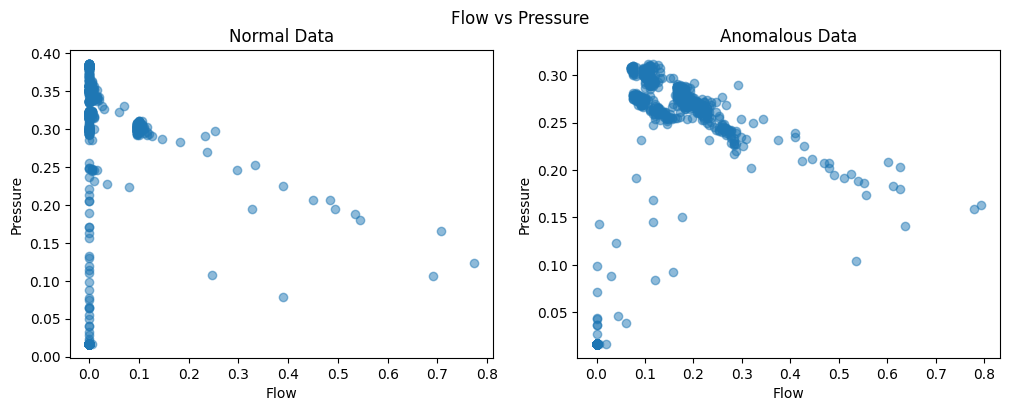

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle("Flow vs Pressure")
ax[0].scatter(df_no_leak['flow'], df_no_leak['pressure'], alpha=0.5)
ax[0].set_title("Normal Data")
ax[0].set_xlabel("Flow")
ax[0].set_ylabel("Pressure")

ax[1].scatter(df_leak['flow'], df_leak['pressure'], alpha=0.5)
ax[1].set_title("Anomalous Data")
ax[1].set_xlabel("Flow")
ax[1].set_ylabel("Pressure")

plt.show()
fig.savefig(os.path.join(FIGURES_DIR, "scatter_plot.png"), dpi=fig.dpi)

## Correlation Between Flow & Pressure

By looking at the two corrrelation heatmaps below, we infer that in anomalous data there is a higher correlation between flow and pressure.

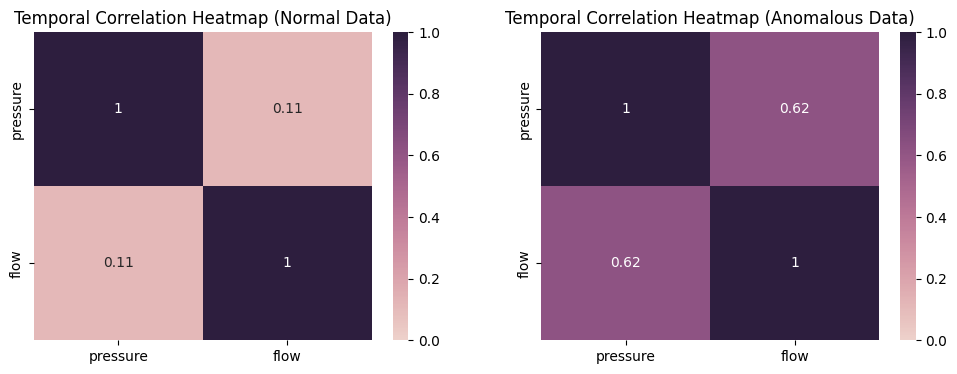

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

sns.heatmap(df_no_leak.corr(), annot=True, vmin=0, vmax=1, ax=ax[0], cmap=sns.cubehelix_palette(as_cmap=True))
ax[0].set_title("Temporal Correlation Heatmap (Normal Data)")

sns.heatmap(df_leak.corr(), annot=True, vmin=0, vmax=1, ax=ax[1], cmap=sns.cubehelix_palette(as_cmap=True))
ax[1].set_title("Temporal Correlation Heatmap (Anomalous Data)")
plt.show()
fig.savefig(os.path.join(FIGURES_DIR, "corr_plot.png"), dpi=fig.dpi)

## Sampling Frequency

In [8]:
print("Sampling Frequency: ", df_leak.index.to_series().diff().median())

Sampling Frequency:  0 days 00:00:01


## Raw Data Sample Visualization

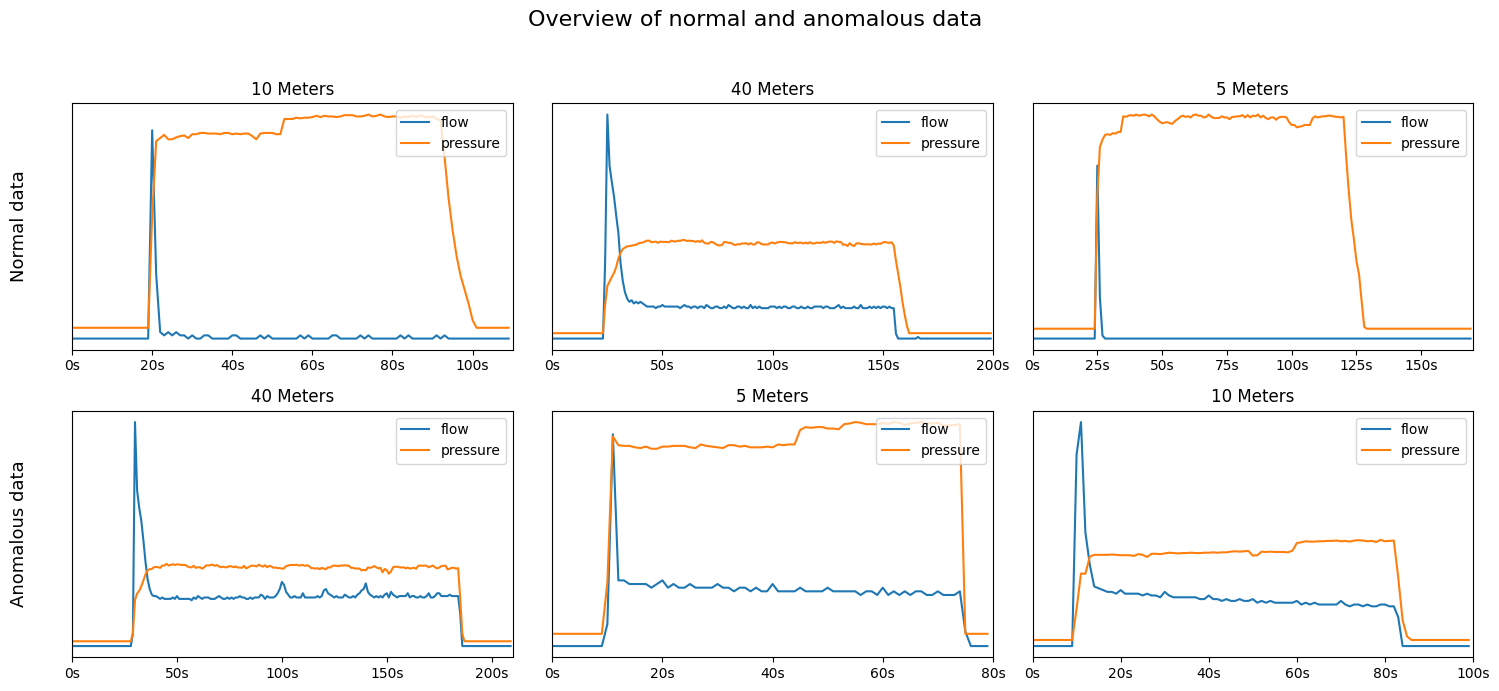

In [7]:
plot_samples(os.path.join(ROOT_DIR, DATA_RAW_DIR))